In [28]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [29]:
# Load the uploaded dataset
file_path = '/content/environmental conditions.csv'
dataset = pd.read_csv(file_path)

In [30]:
# Display the first few rows of the dataset to understand its structure
dataset.head()

,city_name,date,temperature_2m_mean (°C),humidity (%),light_intensity (lux),pythium_probability
0,Polonnaruwa,1/1/2018,25.1,77.601079,10362,High
1,Puttalam,11/7/2022,25.2,78.047213,12026,High
2,Bandarawela,9/19/2010,21.9,81.554111,9060,High
3,Gampaha,6/8/2016,26.2,71.802274,13250,Medium
4,Colombo,8/30/2022,25.4,70.078556,7037,Medium


In [31]:
# Preprocessing
# Encode the target variable
label_encoder = LabelEncoder()
dataset['pythium_probability'] = label_encoder.fit_transform(dataset['pythium_probability'])

In [32]:
# Extract features (X) and target (y)
X = dataset[['temperature_2m_mean (°C)', 'humidity (%)', 'light_intensity (lux)']]
y = dataset['pythium_probability']

In [33]:
# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1200, 3), (300, 3), (1200,), (300,))

In [35]:
# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
# Perform cross-validation and calculate accuracies
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')  # 5-fold CV

In [37]:
# Print validation accuracies
print("Validation Accuracies for each fold:", cv_scores)
print("Mean Validation Accuracy:", np.mean(cv_scores))

Validation Accuracies for each fold: [1.         0.99666667 1.         1.         0.99666667]
Mean Validation Accuracy: 0.9986666666666666


Validation Accuracies for each fold: [1.         0.99666667 1.         1.         0.99666667]
Mean Validation Accuracy: 0.9986666666666666


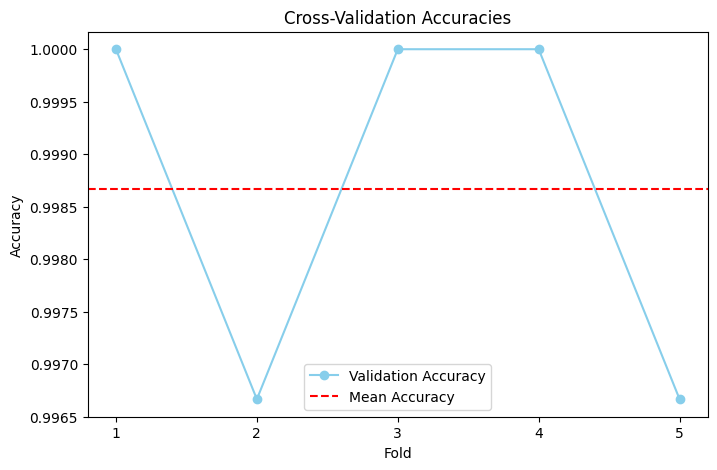

In [38]:
# Print validation accuracies
print("Validation Accuracies for each fold:", cv_scores)
print("Mean Validation Accuracy:", np.mean(cv_scores))

# Plot the validation accuracies
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', color='skyblue', label='Validation Accuracy')
plt.axhline(y=np.mean(cv_scores), color='r', linestyle='--', label='Mean Accuracy')
plt.title('Cross-Validation Accuracies')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(cv_scores) + 1))
plt.legend()
plt.show()

In [39]:
# Predict on the test set
y_pred = model.predict(X_test)

In [40]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

accuracy, classification_rep

(1.0,
 '              precision    recall  f1-score   support\n\n        High       1.00      1.00      1.00       114\n      Medium       1.00      1.00      1.00       186\n\n    accuracy                           1.00       300\n   macro avg       1.00      1.00      1.00       300\nweighted avg       1.00      1.00      1.00       300\n')

In [41]:
# Calculate feature importance
feature_importances = model.feature_importances_

# Get feature names if available
try:
    feature_names = X.columns
except AttributeError:
    feature_names = [f'Feature {i}' for i in range(len(feature_importances))]

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = [feature_names[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

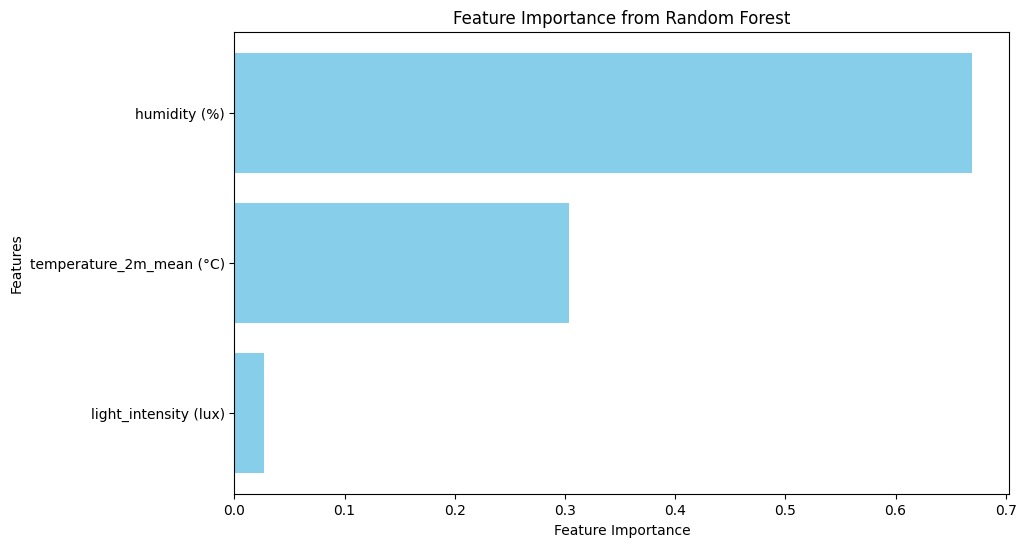

In [45]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to display highest importance at the top
plt.show()

In [42]:
# Predicting Pythium outbreak for sample environmental conditions
sample_conditions = [[26.0, 75.0, 12000]]  # Example: Temperature: 26°C, Humidity: 75%, Light Intensity: 12,000 lux
sample_scaled = scaler.transform(sample_conditions)
sample_prediction = model.predict(sample_scaled)
predicted_label = label_encoder.inverse_transform(sample_prediction)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [43]:
print(f"Predicted Pythium probability for the sample conditions: {predicted_label[0]}")

Predicted Pythium probability for the sample conditions: High


In [44]:
import pickle
import h5py
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Serialize the model using pickle
model_data = pickle.dumps(model)

# Save the serialized model into an .h5 file
with h5py.File('Environment Monitoring.h5', 'w') as h5f:
    h5f.create_dataset('model_data', data=np.void(model_data))

print("Model successfully saved as .h5!")


Model successfully saved as .h5!
